# Preprocessing images and video
This notebook demonstrates the results of preprocessing for various devices on using images and video from the [CIRS 040GSE](https://www.cirsinc.com/products/ultrasound/zerdine-hydrogel/multi-purpose-multi-tisse-ultrasound-phantom/) phantom.

## Butterfly
Below shows results for the Butterfly iQ (note, there's a new Butterfly iQ+).  Note, the orientation mark is still visible in the output image as it is too large to median filter.  Possible solutions are a more advanced in-filling procedure than the median filter used or cropping the image.

orig_img: 
	type: <class 'itk.itkImagePython.itkImageRGBUC2'>, 
	spacing: itkVectorD2 ([1, 1]), 
	size: itkSize2 ([1928, 1080]), 
	min/max RGB value: 0, 255
new_img: 
	type: <class 'itk.itkImagePython.itkImageF2'>, 
	spacing: itkVectorD2 ([0.047619, 0.047619]), 
	size: itkSize2 ([699, 1026]), 
	min/max value: 0.0, 1.0, 
	meta: {'spacing': array([0.04761905, 0.04761905]), 'crop': array([[  36, 1062],
       [ 610, 1309]])}


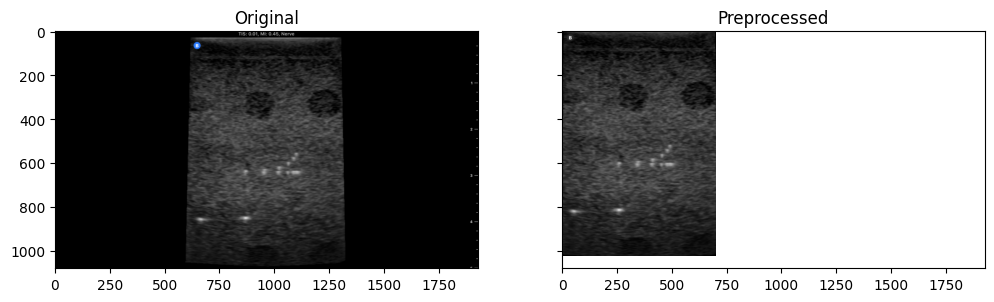

In [6]:
import itk
import matplotlib.pyplot as plt
import sys
import os

# Define the absolute path to the directory containing your module
module_directory = '/mnt/g/00-srcs/ITKPOCUS/itkpocus'

# Add the directory to sys.path
if module_directory not in sys.path:
    sys.path.append(module_directory)
    
import itkpocus.butterfly as butterfly
import numpy as np

fp = '/mnt/g/00-srcs/ITKPOCUS/itkpocus/tests/data/butterfly_axial-lateral-resolution-2020.png'
imgdir=r'/mnt/f/241129-zhipu-thyroid-datas/01-mini-batch/83CasesFirstImg'
imgname=r'thyroidNodules_axp-048_frm-0001.png'
imgfile=os.path.join(imgdir, imgname)
#fp='/mnt/f/241129-zhipu-thyroid-datas/01-mini-batch/83CasesFirstImg/thyroidNodules_axp-048_frm-0001.png'

orig_img = itk.imread(fp)
new_img, meta = butterfly.load_and_preprocess_image(fp)

fig, axs = plt.subplots(1,2, sharex=True, sharey=True, figsize=(12,10))

axs[1].imshow(new_img, cmap='gray')
axs[1].title.set_text('Preprocessed')
axs[0].imshow(orig_img) # since this is the bigger image, have to plot it last for sharex/y to work
axs[0].title.set_text('Original')
#fig.axes.set_aspect('equal')
print('orig_img: \n\ttype: {}, \n\tspacing: {}, \n\tsize: {}, \n\tmin/max RGB value: {}, {}'.format(
    str(type(orig_img)),
    str(orig_img.GetSpacing()),
    str(orig_img.GetLargestPossibleRegion().GetSize()),
    np.min(itk.array_from_image(orig_img)), np.max(itk.array_from_image(orig_img)))
)

print('new_img: \n\ttype: {}, \n\tspacing: {}, \n\tsize: {}, \n\tmin/max value: {}, {}, \n\tmeta: {}'.format(
    str(type(new_img)),
    str(new_img.GetSpacing()),
    str(new_img.GetLargestPossibleRegion().GetSize()),
    np.min(itk.array_from_image(new_img)), np.max(itk.array_from_image(new_img)),
    str(meta))
)

## Clarius

In [7]:
import itk
import matplotlib.pyplot as plt
import itkpocus.clarius as clarius
import numpy as np

fp = imgfile#'../tests/data/clarius_axial-lateral-resolution-2020.png'
orig_img = itk.imread(fp)
new_img, meta = clarius.load_and_preprocess_image(fp)

fig, axs = plt.subplots(1,2, sharex=True, sharey=True, figsize=(12,10))

axs[1].imshow(new_img, cmap='gray')
axs[1].title.set_text('Preprocessed')
axs[0].imshow(orig_img) # since this is the bigger image, have to plot it last for sharex/y to work
axs[0].title.set_text('Original')
#fig.axes.set_aspect('equal')
print('orig_img: \n\ttype: {}, \n\tspacing: {}, \n\tsize: {}, \n\tmin/max RGB value: {}, {}'.format(
    str(type(orig_img)),
    str(orig_img.GetSpacing()),
    str(orig_img.GetLargestPossibleRegion().GetSize()),
    np.min(itk.array_from_image(orig_img)), np.max(itk.array_from_image(orig_img)))
)

print('new_img: \n\ttype: {}, \n\tspacing: {}, \n\tsize: {}, \n\tmin/max value: {}, {}, \n\tmeta: {}'.format(
    str(type(new_img)),
    str(new_img.GetSpacing()),
    str(new_img.GetLargestPossibleRegion().GetSize()),
    np.min(itk.array_from_image(new_img)), np.max(itk.array_from_image(new_img)),
    str(meta))
)

RuntimeError: Could not create IO object for reading file /mnt/f/241129-zhipu-thyroid-datas/01-mini-batch/83CasesFirstImg/thyroidNodules_axp-048_frm-0001.png

## Sonoque

<class 'numpy.ndarray'> uint8 (540, 720, 3)
<class 'itk.itkImagePython.itkImageRGBUC3'> {'0008|0005': 'ISO_IR', '0008|0008': 'ORIGINAL\\PRIMARY\\AXIAL\\0001 ', '0008|0016': '1.2.840.10008.5.1.4.1.1.6.1', '0008|0020': '20200428', '0008|0030': '132834', '0008|0050': '', '0008|0060': 'US', '0008|0090': '', '0010|0010': '--', '0010|0020': '--', '0010|0030': '--', '0010|0040': 'Male', '0018|0015': '', '0018|5050': '40', '0018|6031': 'CURVED LINEAR ', '0020|000d': '1.2.276.0.7230010.3.1.2.0.3510.1588094917.950036', '0020|000e': '1.2.276.0.7230010.3.1.3.0.3510.1588094917.950037', '0028|0002': '3', '0028|0004': 'RGB ', '0028|0006': '0', '0028|0008': '1 ', '0028|0010': '1455', '0028|0011': '2083', '0028|0014': '1', '0028|0100': '8', '0028|0101': '8', '0028|0102': '7', '0028|0103': '0', 'origin': array([0., 0., 0.]), 'spacing': array([1., 1., 1.]), 'direction': array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])}
Shape of the NumPy array: (1, 1455, 2083, 3)
orig_img: 
	type: <class '

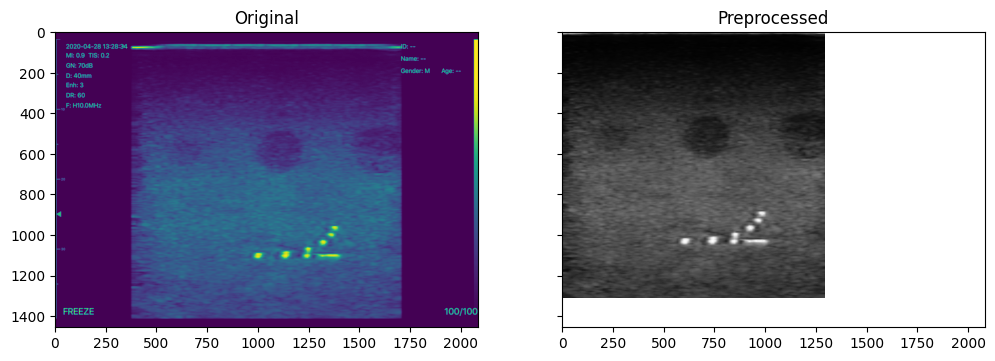

In [44]:
import itk
import matplotlib.pyplot as plt
import itkpocus.sonoque as sonoque
import itkpocus.util
import numpy as np
import cv2

fp = '/mnt/g/00-srcs/ITKPOCUS/itkpocus//tests/data/sonoque_axial-lateral-resolution-2020.dcm'
#fp='/mnt/f/241129-zhipu-thyroid-datas/01-mini-batch/xiaobai-origin/thynodu01.dcm'
#fp='/mnt/f/241129-zhipu-thyroid-datas/01-mini-batch/0001.dcm_frms/frm-0231.png'
file_path='/tmp/frm-0231.png'


image = cv2.imread(file_path)
print(type(image), image.dtype, image.shape)
image_matrix=np.expand_dims(image, axis=0)

itk_image = itk.GetImageFromArray(image_matrix)

orig_img = itk.imread(fp)
#orig_img=itk_image

print(type(orig_img) ,dict(orig_img))
# Convert the ITK image to a NumPy array
numpy_array = itk.GetArrayViewFromImage(orig_img)
# Show the shape of the NumPy array
print(f"Shape of the NumPy array: {numpy_array.shape}")

if 12:
    new_img, meta = sonoque.load_and_preprocess_image(fp)
else:
    npimg_rgb = orig_img
    npimg = npimg_rgb[:,:,0]
    #spacing = 0.000999
    crop = sonoque._find_crop(npimg)
    print(f"crop={crop}")
    
    _A=itkpocus.util.crop(npimg, crop)
    _B=itkpocus.util.crop(npimg_rgb, crop, rgb=True)
    print(f"A={type(_A)}, {_A.shape}")
    print(f"A={type(_B)}, {_B.shape}")
    #npnorm, _ = sonoque._normalize(_A, _B)
    #new_img = itk.image_from_array(npnorm / 255.0)
    #new_img.SetSpacing(spacing)
    new_img=itk.image_from_array(_B)
    
fig, axs = plt.subplots(1,2, sharex=True, sharey=True, figsize=(12,10))

axs[1].imshow(new_img, cmap='gray')
axs[1].title.set_text('Preprocessed')
# sonoque saves as a single-image US series, so we have to remove extraneous 1-element dimensions
axs[0].imshow(itk.array_from_image(orig_img)[0,:,:,0]) # since this is the bigger image, have to plot it last for sharex/y to work
axs[0].title.set_text('Original')
#fig.axes.set_aspect('equal')
print('orig_img: \n\ttype: {}, \n\tspacing: {}, \n\tsize: {}, \n\tmin/max RGB value: {}, {}'.format(
    str(type(orig_img)),
    str(orig_img.GetSpacing()),
    str(orig_img.GetLargestPossibleRegion().GetSize()),
    np.min(itk.array_from_image(orig_img)), np.max(itk.array_from_image(orig_img)))
)
if 0:
    print('new_img: \n\ttype: {}, \n\tspacing: {}, \n\tsize: {}, \n\tmin/max value: {}, {}, \n\tmeta: {}'.format(
        str(type(new_img)),
        str(new_img.GetSpacing()),
        str(new_img.GetLargestPossibleRegion().GetSize()),
        np.min(itk.array_from_image(new_img)), np.max(itk.array_from_image(new_img)),
        str(meta))
    )

## Interson
Coming Soon!

## Sonivate
Sonivate currently doesn't allow direct retrieval of ultrasound images from its device.  We recommend streaming the probe to Slicer and then saving from Slicer.